### Video Games Dataset: EDA
#### 1. Describe Dataset
- **Who:** The data was acquired from Kaggle and supplied by the user Gregory Smith (https://www.kaggle.com/gregorut/videogamesales). The data was scraped from www.vgchartz.com. 
- **What:** The dataset contains a list of video games with sales greater than 100,000 from 1980 to 2011. It contains information such as the platform the game was made available, year of release, genre, publisher, sales in NA, sales in JP, sales in EU, sales in the rest of the world and global sales (total). The data set also includes the rank of games in terms of overall sales. **NOTE: Sales are in millions**
- **When:** The data set was last updated 4 years ago but contains games released from 1980 to seemingly 2017. 
- **Why:** The video game industry is a very competitive yet profitable industry. While big companies with large amounts of resources have an edge over smaller companies, we have recently seen many small companies finding huge success. Not only in game creation but in the case of streamers for example, playing a game before it becomes mainstream might give you an edge against bigger name streamers. With this data set, we are able to gain insight into general idea such as performance of companies, most popular titles and genres. We are also able to dive deeper and look at changing genre popularities over time, regional preference in game genres/platforms, upcoming developer etc.  
- **How:** The data set was scraped from the www.vgzchartz.com website using BeautifulSoup. The scraping script can be found here (https://github.com/GregorUT/vgchartzScrape)

#### 2. Load Dataset

In [14]:
import pandas as pd
import numpy as np
import altair as alt
from altair_saver import save
alt.renderers.enable('mimetype')
alt.data_transformers.enable('data_server')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [15]:
game = pd.read_csv("vgsales.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### 3. Explore Dataset

In [272]:
game.info()

print("\nPlatform:\n",game.Platform.unique(),"\nCount: ",game.Platform.nunique())
print("\nYear\n",game.Year.unique(),"\nCount: ",game.Year.nunique())
print("\nGenre\n",game.Genre.unique(),"\nCount: ",game.Genre.nunique())
print("\nPublishers\n",game.Publisher.unique()[0:15],"\nCount: ",game.Publisher.nunique())

print(game.sort_values("NA_Sales",ascending=False).head(5).iloc[:,0:6])
print(game.sort_values("EU_Sales",ascending=False).head(5).iloc[:,0:6])
print(game.sort_values("JP_Sales",ascending=False).head(5).iloc[:,0:6])
print(game.sort_values("Global_Sales",ascending=False).head(5).iloc[:,0:6])

print(game.groupby("Year").size())
print(game.groupby("Genre").size())
print(game.groupby("Platform").size())

nulls = game[game.isna().any(axis=1)] #List of games with nulls in any field 
game.sort_values("Name").loc[game.Name.isin(game.Name[game.Name.duplicated()]),["Name","Platform"]].head(15) #Game titles that show up on multiple platforms 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  Int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB

Platform:
 ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX'] 
Count:  31

Year
 <IntegerArray>
[2006, 1985, 2008, 2009, 19

,Name,Platform
4499,007: Quantum of Solace,PS2
9318,007: Quantum of Solace,DS
1273,007: Quantum of Solace,X360
14547,007: Quantum of Solace,PC
3038,007: Quantum of Solace,Wii
1739,007: Quantum of Solace,PS3
2247,007: The World is not Enough,PS
1200,007: The World is not Enough,N64
15552,11eyes: CrossOver,PSP
15005,11eyes: CrossOver,X360


#### 4. Initial thoughts?
- We have null values in Year and Publisher (Total of 307 rows with NaN values)
- Year is a float, we could probably turn it into an int to make it prettier
- We have 31 unique Platforms
- We have 39 unique years (one being NaN)
- We have 12 unique genres
- We have 578 unique publishers
- Looking at the top games in each region EU and NA are more similar in taste than JP
    -JP loves their Pokemon
    -Nintendo is the dominating Publisher in all regions 
- Years with the most releases are 2006 to 2011 with a peak of 1431 releases in 2009.

#### 5. Wrangling
The main concern would be the NaN values.

In [291]:
game.Year = game.Year.astype("Int64")
print(nulls.groupby("Year").size())
print(nulls.groupby("Genre").size())
print(nulls.groupby("Platform").size())

#For the analysis of sales - melting the NA,EU,JP,Other and Total columns
game_melt = game.melt(id_vars=["Rank", "Name","Platform","Year","Genre","Publisher"], 
        var_name="Region", 
        value_name="Sales").reset_index(drop=True)
game_melt

Year
2004    19
2005     5
2007     1
2010     2
2011     3
2012     2
2014     2
2016     2
dtype: int64
Genre
Action          65
Adventure       12
Fighting        12
Misc            53
Platform        11
Puzzle          12
Racing          24
Role-Playing    18
Shooter         28
Simulation      19
Sports          42
Strategy        11
dtype: int64
Platform
2600    17
3DS     10
DS      32
GB       1
GBA     36
GC      14
N64      3
PC      22
PS       7
PS2     34
PS3     25
PSP     16
PSV      3
Wii     35
X360    31
XB      21
dtype: int64


,Rank,Name,Platform,Year,Genre,Publisher,Region,Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,NA_Sales,41.49
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,NA_Sales,29.08
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,NA_Sales,15.85
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,NA_Sales,15.75
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,NA_Sales,11.27
...,...,...,...,...,...,...,...,...
82985,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,Global_Sales,0.01
82986,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,Global_Sales,0.01
82987,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,Global_Sales,0.01
82988,16599,Know How 2,DS,2010,Puzzle,7G//AMES,Global_Sales,0.01


#### 6. Research Questions/Visualization+Analysis

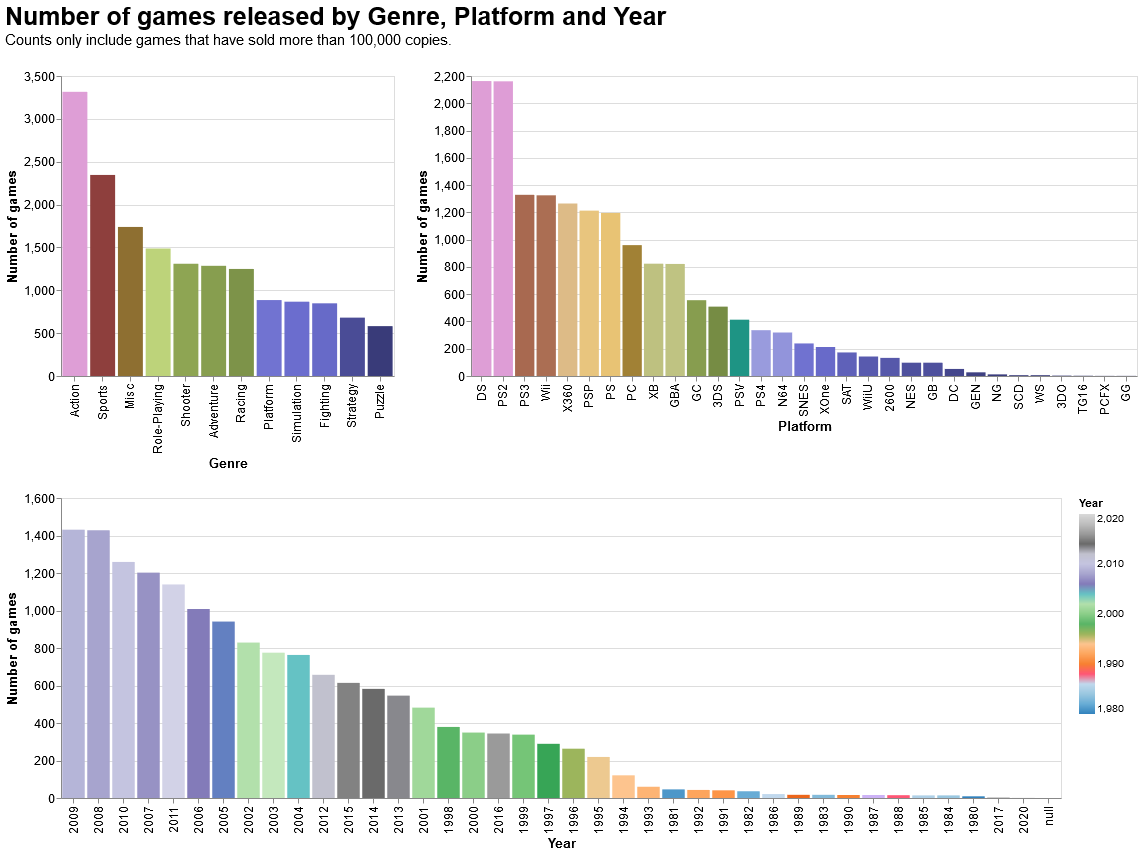

In [196]:
#1) Basic Exploratory visualisations of things we noted in the Initial Thoughts
#Counts of number of games in each genre, platform and number of games released in each year
#Genre and Platform counts are coloured by number of counts and sorted from largest to smallest
#Year counts are coloured by year and sorted from largest to smallest 
sorted_genre_count = list(game.groupby("Genre").size().sort_values(ascending=False).index)
sorted_year_count = list(game.groupby("Year").size().sort_values(ascending=False).index)
sorted_platform_count = list(game.groupby("Platform").size().sort_values(ascending=False).index)

genre_count = alt.Chart(game).mark_bar().encode(
    alt.X("Genre",type="nominal",sort=sorted_genre_count),
    alt.Y("count()",title="Number of games",type="quantitative"),
    alt.Color("count()",scale=alt.Scale(scheme='category20b'),legend=None),
    alt.Tooltip("count()"))

year_count = alt.Chart(game).mark_bar().encode(
    alt.X("Year",type="ordinal",sort=sorted_year_count),
    alt.Y("count()",title="Number of games",type="quantitative"),
    alt.Color("Year",scale=alt.Scale(scheme='category20c')),
    alt.Tooltip("count()"))

platform_count = alt.Chart(game).mark_bar().encode(
    alt.X("Platform",type="nominal",sort=sorted_platform_count),
    alt.Y("count()",title="Number of games",type="quantitative"),
    alt.Color("count()",scale=alt.Scale(scheme='category20b'),legend=None),
    alt.Tooltip("count()"))

count_plots = ((genre_count.properties(width=333)|platform_count.properties(width=666)).resolve_scale(color='independent')
               &year_count.properties(width=1000)).resolve_scale(color='independent').configure_axis(
                labelFontSize=12,
                titleFontSize=13)
count_plots = count_plots.properties(title={"text": "Number of games released by Genre, Platform and Year", 
      "subtitle": ["Counts only include games that have sold more than 100,000 copies.",""]}).configure_title(fontSize = 25,subtitleFontSize=15)

count_plots

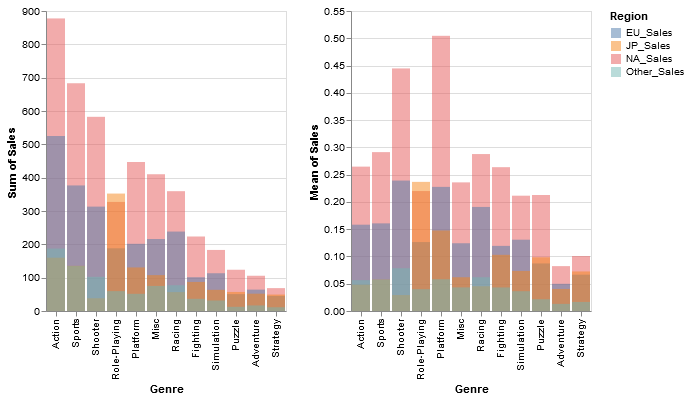

In [333]:
#2) Lets look at sales across Genres for each Region
#Genres are sorted by decreasing Global Sales (Action is most sales vs Strategy is least)
#Notice we see Shooters - while having fewer games released, still sold a lot of copies meaning their titles seemed to do well and the same (to a larger extent) can be said about Platformers.
#Looking at the means of each genre, we can see exacly as we noticed above with the mean number of sales in the Shooter/Platform genre now ahead of the rest. 
#It is also interesting to see the trend across genres. We see NA, EU and Other sale patters tend to be more similar while JP sale patterns are distinct from the other regions, with a large emphasis on RPG, Platformers. 

sales_data = game_melt.loc[game_melt.Region != "Global_Sales",:]
sorted_genre_totalsales = list(game.groupby("Genre").sum().sort_values("Global_Sales",ascending=False).index)

genre_sales = alt.Chart(sales_data).mark_bar(opacity=0.5).encode(
    alt.X("Genre",type="nominal",sort=sorted_genre_totalsales),
    alt.Y("sum(Sales)",type="quantitative",stack=None),
    alt.Color("Region",type="nominal"))
genre_mean_sales = alt.Chart(sales_data).mark_bar(opacity=0.5).encode(
    alt.X("Genre",type="nominal",sort=sorted_genre_totalsales),
    alt.Y("mean(Sales)",type="quantitative",stack=None),
    alt.Color("Region",type="nominal"))
genre_sales | genre_mean_sales

In [ ]:
#3) Lets investigate what's going on in each region. We can do so by looking at individual title by region and color the points by genre. 
    #This might help us explain and point out individual game titles that are dominating their genre.


#### 7. Future Studies